Der Einkauf von Lidl möchte das Süßwarensortiment (Eigenmarke) erweitern. Hierzu soll eine neue Süßigkeit
kreiert werden. Jedoch besteht innerhalb des betreffenden Projektteams noch Uneinigkeit über die
Charakteristika der neuen Süßigkeit.
Während die Einen beispielsweise eine Keks-basierte Süßigkeit bevorzugen, favorisieren Andere eine
Fruchtgummivariation. Daher hat der Bereichsvorstand beschlossen ein Marktforschungsunternehmen zu
beauftragen, um die Beliebtheit, der am Markt erhältlichen Süßwaren, zu ermitteln.
Die Ergebnisse der Marktforschung liegen nun vor und Sie wurden beauftragt eine Analyse der Daten
durchzuführen. Ziel ist es, die Auswirkung der Charakteristika von Süßwaren auf deren Beliebtheit zu analysieren
und auf Basis dieser Analyse eine Empfehlung für die neue Süßigkeit abzugeben.

**Annahmen**: Winprecent ist representativ für die Zielgruppe von Lidl

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn import linear_model
%matplotlib inline

In [5]:
df = pd.read_csv("candy-data.csv")

In [10]:
profile = ProfileReport(df)
profile.to_file(output_file='output.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df.sort_values(by="winpercent",ascending=False)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


In [28]:
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
X = df[features]
y = df['winpercent']
reg = linear_model.LinearRegression()
reg.fit(X, y)
inter = reg.intercept_
coefs = reg.coef_
score = reg.score(X, y)
score


0.514809706138915

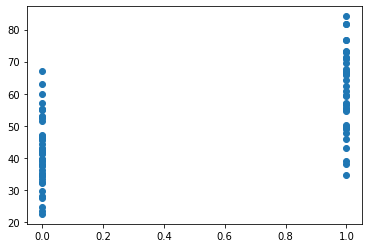

In [39]:
plt.scatter(x=df.chocolate,y=df.winpercent)

chocolate


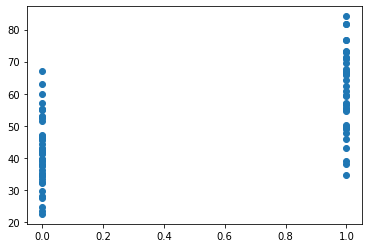

fruity


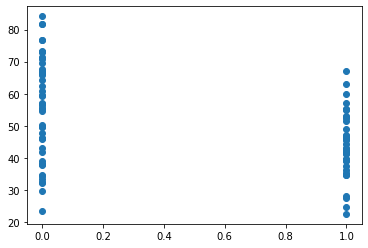

caramel


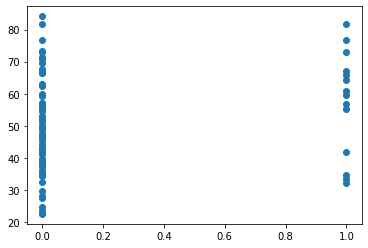

peanutyalmondy


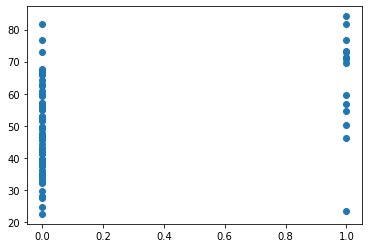

nougat


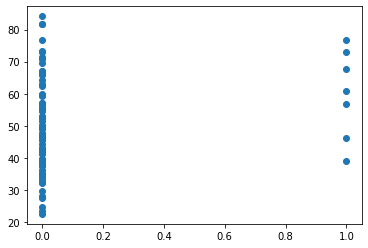

crispedricewafer


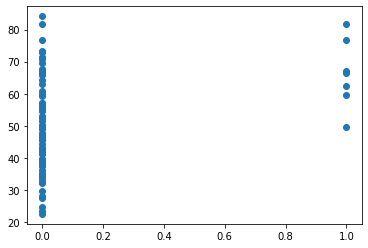

hard


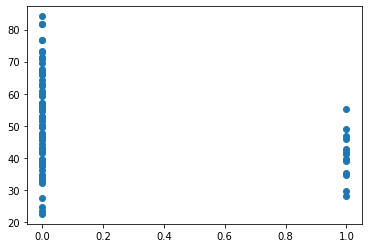

bar


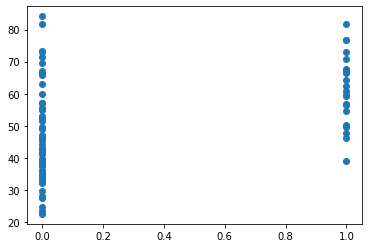

pluribus


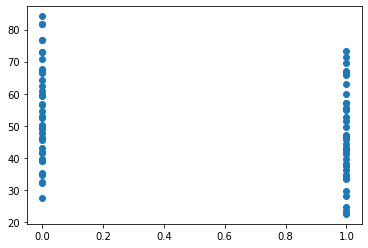

In [49]:
for ft in features:
    print(ft)
    plt.scatter(x=df[ft],y=df.winpercent)
    plt.show()

In [29]:
coefs

array([19.90579455, 10.26773158,  3.38428178, 10.14101727,  2.41625176,
        8.99154904, -4.8725601 , -0.72196626, -0.15991743])

In [30]:
equation = 'winpercent ='
for feature, coef in zip(features, coefs):
    if coef >= 0:
        equation += ' + '
    else:
        equation += ' - '
        coef *= -1
    equation += f'{round(coef, 3)} * {feature}'
if inter >= 0:
    equation += f' + {round(inter, 3)}'
else:
    inter *= -1
    equation += f' - {round(inter, 3)}'
equation

'winpercent = + 19.906 * chocolate + 10.268 * fruity + 3.384 * caramel + 10.141 * peanutyalmondy + 2.416 * nougat + 8.992 * crispedricewafer - 4.873 * hard - 0.722 * bar - 0.16 * pluribus + 35.015'

In [37]:
df_weights = pd.DataFrame({'feature': features, 'weight': coefs})
df_weights.sort_values(by=['weight'], ascending=False, inplace=True)
df_weights.weight = round(df_weights.weight,2)

In [38]:
df_weights

,feature,weight
0,chocolate,19.91
1,fruity,10.27
3,peanutyalmondy,10.14
5,crispedricewafer,8.99
2,caramel,3.38
4,nougat,2.42
8,pluribus,-0.16
7,bar,-0.72
6,hard,-4.87
